Maximum landing distance = 71.088 meters


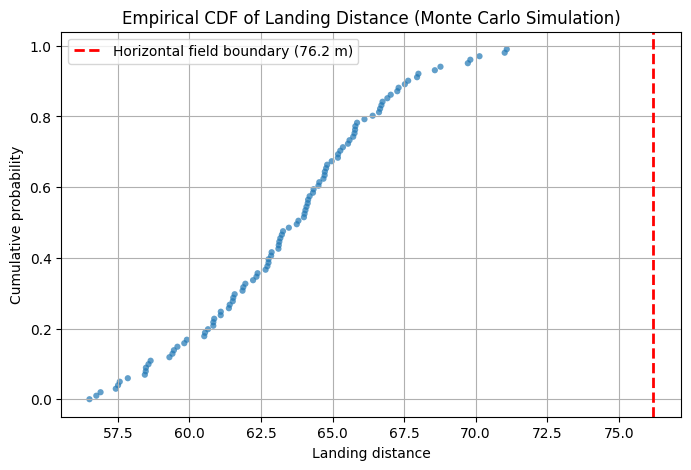

In [12]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

FIELD_LIMIT = 76.2 # (meters)

es = [] # create empty lists to hold landing distances north and east of central launch site
ns = []

for file in glob.glob("*.csv"): # loop through CSVs and extract the last value of the second and third columns, i.e., landing distances
    df = pd.read_csv(file, comment="#")
    east = df.iloc[-1, 1]   
    north = df.iloc[-1, 2]
    if np.abs(east) >= FIELD_LIMIT or np.abs(north) >= FIELD_LIMIT: # test for boundary violations
        print("Rocket outside of field")
    es.append(np.abs(east)) # append the landing distances to their respective lists
    ns.append(np.abs(north))

monotonic_es = np.sort(es) # arrange values by magnitude for a CDF
CDF_es = []
for i in range(len(monotonic_es)): # fill CDF_es with CDF values 
    CDF_es.append(i/101)

plt.figure(figsize=(8, 5)) # graph CDF
plt.grid(True)
plt.xlabel('Landing distance')
plt.ylabel('Cumulative probability')
plt.title('Empirical CDF of Landing Distance (Monte Carlo Simulation)')
plt.scatter(monotonic_es, CDF_es, s=20, alpha=0.7, color="#1f77b4", edgecolors="none")
plt.axvline(FIELD_LIMIT, color="red", linestyle="--", linewidth=2, label="Horizontal field boundary (76.2 m)")
plt.legend()
print('Maximum landing distance =', monotonic_es[-1], 'meters')